In [4]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.datasets import imdb
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

In [5]:
data_2 = pd.read_csv("dataset_2.csv")
data_2 = data_2.drop(["Unnamed: 0", "Unnamed: 0.1", "file_id"], axis=1)
data_2.columns = ["label", "tweet"]
data_2 = pd.concat([data_2["tweet"], data_2["label"]], axis=1)
data_2.loc[data_2['label'] == "noHate", "label"] = '0'
data_2.loc[data_2['label'] == "hate", "label"] = '1'
data_2.loc[data_2['label'] == "idk/skip", "label"] = '0'
data_2.loc[data_2['label'] == "relation", "label"] = '0'

data_2.fillna(0)
data_2


,tweet,label
0,"As of March 13th , 2014 , the booklet had been...",0
1,In order to help increase the booklets downloa...,0
2,( Simply copy and paste the following text int...,0
3,Click below for a FREE download of a colorfull...,1
4,Click on the `` DOWNLOAD ( 7.42 MB ) '' green ...,0
...,...,...
10939,"Billy - `` That guy would n't leave me alone ,...",0
10940,Wish we at least had a Marine Le Pen to vote f...,0
10941,Its like the choices are white genocide candid...,0
10942,Why White people used to say that sex was a si...,1


In [6]:
d2 = data_2['tweet'].values.astype('U')
labels = data_2['label'].values.astype('int32')

In [7]:
vectorizer = CountVectorizer(min_df=0, lowercase=True, stop_words="english")
vectorizer.fit(d2)
vectorizer.vocabulary

In [8]:
data2 = vectorizer.transform(d2).toarray()

In [9]:
max_features = 5000
maxlen = 400
batch_size = 32
embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250
epochs = 20

x_train_2, x_test_2, y_train_2, y_test_2= train_test_split(data2, labels, test_size=0.3)



In [10]:
print('Pad sequences (samples x time)')
x_train_2 = sequence.pad_sequences(x_train_2, maxlen=maxlen)
x_test_2 = sequence.pad_sequences(x_test_2, maxlen=maxlen)
print('x_train shape:', x_train_2.shape)
print('x_test shape:', x_test_2.shape)

Pad sequences (samples x time)
x_train shape: (7660, 400)
x_test shape: (3284, 400)


In [11]:
print('Build model...')
model = Sequential()


Build model...



In [12]:
model.add(Embedding(max_features, embedding_dims, input_length=maxlen))

model.add(Dropout(0.2))




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())

In [14]:
#SIGMOID RELU
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

In [118]:
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [120]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train_2, y_train_2,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test_2, y_test_2))

Train on 7660 samples, validate on 3284 samples
Epoch 1/20
7660/7660 [==============================] - 29s 4ms/step - loss: 0.3597 - acc: 0.8866 - val_loss: 0.3256 - val_acc: 0.9004
Epoch 2/20
7660/7660 [==============================] - 31s 4ms/step - loss: 0.3559 - acc: 0.8866 - val_loss: 0.3361 - val_acc: 0.9004
Epoch 3/20
7660/7660 [==============================] - 31s 4ms/step - loss: 0.3554 - acc: 0.8866 - val_loss: 0.3494 - val_acc: 0.9004
Epoch 4/20
7660/7660 [==============================] - 31s 4ms/step - loss: 0.3565 - acc: 0.8866 - val_loss: 0.3311 - val_acc: 0.9004
Epoch 5/20
7660/7660 [==============================] - 31s 4ms/step - loss: 0.3558 - acc: 0.8866 - val_loss: 0.3239 - val_acc: 0.9004
Epoch 6/20
7660/7660 [==============================] - 31s 4ms/step - loss: 0.3546 - acc: 0.8866 - val_loss: 0.3414 - val_acc: 0.9004
Epoch 7/20
7660/7660 [==============================] - 31s 4ms/step - loss: 0.3564 - acc: 0.8866 - val_loss: 0.3343 - val_acc: 0.9004
Epoch 8

<function matplotlib.pyplot.show(*args, **kw)>

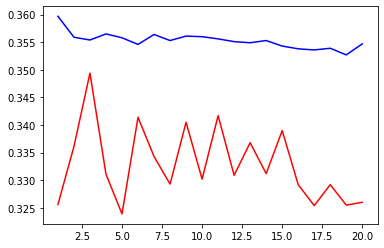

In [122]:
list_loss = [0.3597,0.3559,0.3554,0.3565,0.3558,0.3546,0.3564,0.3553,0.3561,0.3560,0.3556,0.3551,0.3549,0.3553,0.3543,0.3538,0.3536,0.3539,0.3527,0.3547]
list_val_loss = [0.3256,0.3361,0.3494,0.3311,0.3239,0.3414,0.3343,0.3293,0.3405,0.3302,0.3417,0.3309,0.3368,0.3312,0.3390,0.3292,0.3254,0.3292,0.3255,0.3260]

plt.plot(range(1,21), list_loss, color="b")
plt.title = "loss"
plt.xlabel = "range"
plt.ylabel = "loss values"
plt.show

plt.plot(range(1,21), list_val_loss, color="r")
plt.title = "val_loss"
plt.xlabel = "range"
plt.ylabel = "val_loss values"
plt.show

In [15]:
epochs = 10 # EPOCH U EN OPTIMAL DEGERE GORE AYARLA

In [16]:
batch_size = 16
x_train_2 = sequence.pad_sequences(x_train_2, maxlen=maxlen)
x_test_2 = sequence.pad_sequences(x_test_2, maxlen=maxlen)
model = Sequential()
model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
model.add(Dropout(0.2))
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train_2, y_train_2,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test_2, y_test_2))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 7660 samples, validate on 3284 samples
Epoch 1/10





7660/7660 [==============================] - 31s 4ms/step - loss: 0.3507 - acc: 0.8928 - val_loss: 0.3604 - val_acc: 0.8849
Epoch 2/10
7660/7660 [==============================] - 34s 4ms/step - loss: 0.3450 - acc: 0.8932 - val_loss: 0.3633 - val_acc: 0.8849
Epoch 3/10
7660/7660 [==============================] - 34s 4ms/step - loss: 0.3443 - acc: 0.8932 - val_loss: 0.3776 - val_acc: 0.8849
Epoch 4/10
7660/7660 [==============================] - 33s 4ms/step - loss: 0.3440 - acc: 0.8932 - val_loss: 0.3753 - val_acc: 0.8849
Epoch 5/10
7660/7660 [==============================] - 33s 4ms/step - loss: 0.3456 - acc: 0.8932 - val_loss: 0.3660 - val_acc: 0.8849
Epoch 6/10
7660/7660 [==============================] - 35s 5ms/step - loss: 0.3427 - acc: 0.8932 - val_loss: 0.3685 - val_acc: 0.8849
Epoch 7/10
7660/7660 [================

In [17]:
batch_size = 64
x_train_2 = sequence.pad_sequences(x_train_2, maxlen=maxlen)
x_test_2 = sequence.pad_sequences(x_test_2, maxlen=maxlen)
model = Sequential()
model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
model.add(Dropout(0.2))
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train_2, y_train_2,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test_2, y_test_2))

Train on 7660 samples, validate on 3284 samples
Epoch 1/10
7660/7660 [==============================] - 37s 5ms/step - loss: 0.3590 - acc: 0.8932 - val_loss: 0.3766 - val_acc: 0.8849
Epoch 2/10
7660/7660 [==============================] - 35s 5ms/step - loss: 0.3433 - acc: 0.8932 - val_loss: 0.3639 - val_acc: 0.8849
Epoch 3/10
7660/7660 [==============================] - 38s 5ms/step - loss: 0.3426 - acc: 0.8932 - val_loss: 0.3662 - val_acc: 0.8849
Epoch 4/10
7660/7660 [==============================] - 37s 5ms/step - loss: 0.3421 - acc: 0.8932 - val_loss: 0.3705 - val_acc: 0.8849
Epoch 5/10
7660/7660 [==============================] - 36s 5ms/step - loss: 0.3415 - acc: 0.8932 - val_loss: 0.3669 - val_acc: 0.8849
Epoch 6/10
7660/7660 [==============================] - 37s 5ms/step - loss: 0.3425 - acc: 0.8932 - val_loss: 0.3599 - val_acc: 0.8849
Epoch 7/10
7660/7660 [==============================] - 36s 5ms/step - loss: 0.3406 - acc: 0.8932 - val_loss: 0.3839 - val_acc: 0.8849
Epoch 8

In [18]:
batch_size = 128
x_train_2 = sequence.pad_sequences(x_train_2, maxlen=maxlen)
x_test_2 = sequence.pad_sequences(x_test_2, maxlen=maxlen)
model = Sequential()
model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
model.add(Dropout(0.2))
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train_2, y_train_2,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test_2, y_test_2))

Train on 7660 samples, validate on 3284 samples
Epoch 1/10
7660/7660 [==============================] - 38s 5ms/step - loss: 0.3825 - acc: 0.8799 - val_loss: 0.3711 - val_acc: 0.8849
Epoch 2/10
7660/7660 [==============================] - 40s 5ms/step - loss: 0.3420 - acc: 0.8932 - val_loss: 0.3687 - val_acc: 0.8849
Epoch 3/10
7660/7660 [==============================] - 35s 5ms/step - loss: 0.3419 - acc: 0.8932 - val_loss: 0.3637 - val_acc: 0.8849
Epoch 4/10
7660/7660 [==============================] - 35s 5ms/step - loss: 0.3414 - acc: 0.8932 - val_loss: 0.3858 - val_acc: 0.8849
Epoch 5/10
7660/7660 [==============================] - 37s 5ms/step - loss: 0.3441 - acc: 0.8932 - val_loss: 0.3695 - val_acc: 0.8849
Epoch 6/10
7660/7660 [==============================] - 36s 5ms/step - loss: 0.3424 - acc: 0.8932 - val_loss: 0.3732 - val_acc: 0.8849
Epoch 7/10
7660/7660 [==============================] - 39s 5ms/step - loss: 0.3409 - acc: 0.8932 - val_loss: 0.3649 - val_acc: 0.8849
Epoch 8

In [19]:
batch_size = 32 # EN IYI BATCH SIZE I BULUP BUNU DEGISTIR

In [20]:
# SIGMOID SIGMOID
x_train_2 = sequence.pad_sequences(x_train_2, maxlen=maxlen)
x_test_2 = sequence.pad_sequences(x_test_2, maxlen=maxlen)
model = Sequential()
model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
model.add(Dropout(0.2))
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('sigmoid'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train_2, y_train_2,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test_2, y_test_2))

Train on 7660 samples, validate on 3284 samples
Epoch 1/10
7660/7660 [==============================] - 38s 5ms/step - loss: 0.3516 - acc: 0.8867 - val_loss: 0.3612 - val_acc: 0.8849
Epoch 2/10
7660/7660 [==============================] - 37s 5ms/step - loss: 0.3416 - acc: 0.8932 - val_loss: 0.3572 - val_acc: 0.8849
Epoch 3/10
7660/7660 [==============================] - 36s 5ms/step - loss: 0.3417 - acc: 0.8932 - val_loss: 0.3584 - val_acc: 0.8849
Epoch 4/10
7660/7660 [==============================] - 35s 5ms/step - loss: 0.3420 - acc: 0.8932 - val_loss: 0.3577 - val_acc: 0.8849
Epoch 5/10
7660/7660 [==============================] - 37s 5ms/step - loss: 0.3405 - acc: 0.8932 - val_loss: 0.3611 - val_acc: 0.8849
Epoch 6/10
7660/7660 [==============================] - 37s 5ms/step - loss: 0.3422 - acc: 0.8932 - val_loss: 0.3591 - val_acc: 0.8849
Epoch 7/10
7660/7660 [==============================] - 36s 5ms/step - loss: 0.3427 - acc: 0.8932 - val_loss: 0.3573 - val_acc: 0.8849
Epoch 8

In [21]:
# RELU RELU
x_train_2 = sequence.pad_sequences(x_train_2, maxlen=maxlen)
x_test_2 = sequence.pad_sequences(x_test_2, maxlen=maxlen)
model = Sequential()
model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
model.add(Dropout(0.2))
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('relu'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train_2, y_train_2,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test_2, y_test_2))

Train on 7660 samples, validate on 3284 samples
Epoch 1/10
7660/7660 [==============================] - 37s 5ms/step - loss: 0.3456 - acc: 0.8932 - val_loss: 0.3732 - val_acc: 0.8849
Epoch 2/10
7660/7660 [==============================] - 39s 5ms/step - loss: 0.3414 - acc: 0.8932 - val_loss: 0.3594 - val_acc: 0.8849
Epoch 3/10
7660/7660 [==============================] - 40s 5ms/step - loss: 0.3391 - acc: 0.8932 - val_loss: 0.3575 - val_acc: 0.8849
Epoch 4/10
7660/7660 [==============================] - 39s 5ms/step - loss: 0.3396 - acc: 0.8932 - val_loss: 0.3584 - val_acc: 0.8849
Epoch 5/10
7660/7660 [==============================] - 36s 5ms/step - loss: 0.3390 - acc: 0.8932 - val_loss: 0.3577 - val_acc: 0.8849
Epoch 6/10
7660/7660 [==============================] - 38s 5ms/step - loss: 0.3400 - acc: 0.8932 - val_loss: 0.3584 - val_acc: 0.8849
Epoch 7/10
7660/7660 [==============================] - 38s 5ms/step - loss: 0.3392 - acc: 0.8932 - val_loss: 0.3577 - val_acc: 0.8849
Epoch 8

In [22]:
# TANH TANH
x_train_2 = sequence.pad_sequences(x_train_2, maxlen=maxlen)
x_test_2 = sequence.pad_sequences(x_test_2, maxlen=maxlen)
model = Sequential()
model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
model.add(Dropout(0.2))
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('tanh'))
model.add(Dense(1))
model.add(Activation('tanh'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train_2, y_train_2,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test_2, y_test_2))

Train on 7660 samples, validate on 3284 samples
Epoch 1/10
7660/7660 [==============================] - 39s 5ms/step - loss: 0.3596 - acc: 0.8932 - val_loss: 0.3913 - val_acc: 0.8849
Epoch 2/10
7660/7660 [==============================] - 37s 5ms/step - loss: 0.3426 - acc: 0.8932 - val_loss: 0.3619 - val_acc: 0.8849
Epoch 3/10
7660/7660 [==============================] - 34s 4ms/step - loss: 0.3429 - acc: 0.8932 - val_loss: 0.3611 - val_acc: 0.8849
Epoch 4/10
7660/7660 [==============================] - 35s 5ms/step - loss: 0.3404 - acc: 0.8932 - val_loss: 0.3596 - val_acc: 0.8849
Epoch 5/10
7660/7660 [==============================] - 36s 5ms/step - loss: 0.3407 - acc: 0.8932 - val_loss: 0.3595 - val_acc: 0.8849
Epoch 6/10
7660/7660 [==============================] - 35s 5ms/step - loss: 0.3407 - acc: 0.8932 - val_loss: 0.3568 - val_acc: 0.8849
Epoch 7/10
7660/7660 [==============================] - 37s 5ms/step - loss: 0.3405 - acc: 0.8932 - val_loss: 0.3594 - val_acc: 0.8849
Epoch 8